# 以下是一个最简单的模型，展示上升沿检测

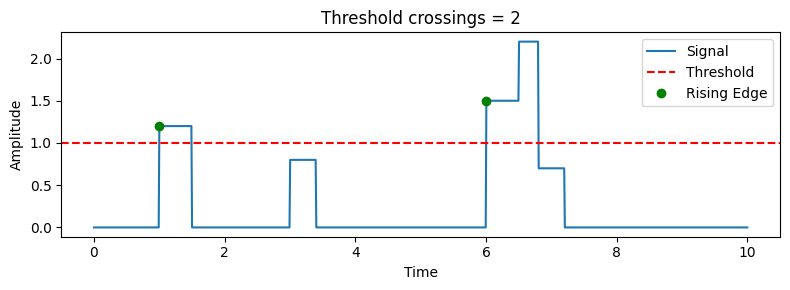

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def count_crossings(sig, thr, eps=1e-12):
    """计算信号从 <thr 到 >=thr 的上升沿个数（事件数）"""
    above = sig >= (thr + eps)
    rise = above & np.roll(~above, 1)
    rise[0] = False
    return int(rise.sum()), rise

# --------------------------
# 1. 生成一个简单的波形
t = np.linspace(0, 10, 1000)          # 时间轴
sig = np.zeros_like(t)

# 模拟几个脉冲
sig[100:150] += 1.2      # 第1个脉冲
sig[300:340] += 0.8      # 第2个脉冲
sig[600:680] += 1.5      # 第3个脉冲
sig[650:720] += 0.7      # 第4个脉冲，与第3个重叠 → pile-up

thr = 1.0                 # 阈值

# 2. 调用 count_crossings
count, rise_mask = count_crossings(sig, thr)

# 3. 可视化
plt.figure(figsize=(8, 3))
plt.plot(t, sig, label='Signal')
plt.axhline(thr, color='r', linestyle='--', label='Threshold')
plt.plot(t[rise_mask], sig[rise_mask], 'go', label='Rising Edge')  # 标记上升沿

plt.title(f"Threshold crossings = {count}")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()
